# Chapter 12: Parallelizing Neural Network Training with PyTorch

## First steps with PyTorch

### Creating tensors

In [2]:
import torch
import numpy as np
np.set_printoptions(precision=3)

a = [1,2,3]
b = np.array([1,2,3], dtype=np.float32)
t1 = torch.tensor(a)
t2 = torch.tensor(b)
print(t1)
print(t2)

tensor([1, 2, 3])
tensor([1., 2., 3.])


In [3]:
t_ones = torch.ones(2,3)
t_zeros = torch.zeros(2,3)
t_rand = torch.rand(2,3)
print(t_ones)
print(t_zeros)
print(t_rand)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[0.7561, 0.2495, 0.5498],
        [0.0668, 0.0151, 0.2099]])


### Manipulating the data type and shape of a tensor

In [6]:
t1_new = t1.to(torch.int64)
print(t1_new.dtype)

torch.int64


In [7]:
t = torch.rand(3,5)
#transpose
t_tr = torch.transpose(t, 0, 1) # podajemy osie do zamiany
print(t.shape)
print(t_tr.shape)

torch.Size([3, 5])
torch.Size([5, 3])


In [8]:
t=torch.zeros(30)
#reshape
t_reshape = t.reshape(5,6) # na jaki rozmiar
print(t_reshape.shape)

torch.Size([5, 6])


In [12]:
#Removing the unnecessary dimensions (dimensions that have size 1, which are not needed):
t = torch.rand(1,2,1,3,1)
t_sqz = torch.squeeze(t) # mozemy podac dokladnie ktora, jesli nie to usunie wszystkie o rozmiarze 1
print(t.shape)
print(t_sqz.shape)

torch.Size([1, 2, 1, 3, 1])
torch.Size([2, 3])


### Applying mathematical operations to tensors

In [13]:
torch.manual_seed(1)

t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))
print(t1.shape)
print(t2.shape)

torch.Size([5, 2])
torch.Size([5, 2])


In [14]:
# Element wise product
t3 = torch.multiply(t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


In [15]:
t4 = torch.mean(t1, axis=0)
print(t4)
t4 = torch.mean(t1, axis=1)
print(t4)

tensor([-0.1373,  0.2028])
tensor([ 0.0369,  0.1378, -0.1709,  0.1515,  0.0083])


In [16]:
#multiplication
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


torch.linalg.norm() function is useful for computing the Lp norm of a tensor. For example,
we can calculate the L2 norm of t1 as follows:


In [17]:
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1) #sqrt(a^2+b^2)
print(t1)
print(norm_t1)

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])
tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


### Split, stack, and concatenate tensors

Splitting

In [18]:
torch.manual_seed(1)

t = torch.rand(6)

print(t)

t_splits = torch.chunk(t, 3)

[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

In [19]:
torch.manual_seed(1)
t = torch.rand(5)

print(t)

t_splits = torch.split(t, split_size_or_sections=[3, 2])

[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

Stacking and concat


In [20]:
A = torch.ones(3)
B = torch.zeros(2)

C = torch.cat([A, B], axis=0)
print(C)

tensor([1., 1., 1., 0., 0.])


In [22]:
A = torch.ones(2,3)
B = torch.zeros(2,3)

C = torch.stack([A, B], axis=1)
print(C)
C = torch.stack([A, B], axis=0)
print(C)

tensor([[[1., 1., 1.],
         [0., 0., 0.]],

        [[1., 1., 1.],
         [0., 0., 0.]]])
tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])


## Building input pipelines in PyTorch

### Creating a PyTorch DataLoader from existing tensors

In [25]:
from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.float32)
dl = DataLoader(t,batch_size=3,drop_last=False)

for i,batch in enumerate(dl):
  print(f'batch {i}:', batch)

batch 0: tensor([0., 1., 2.])
batch 1: tensor([3., 4., 5.])


The optional drop_last argument is useful for cases when
the number of elements in the tensor is not divisible by the desired batch size. We can drop the last
non-full batch by setting drop_last to True. The default value for drop_last is False.

### Combining two tensors into a joint dataset

Assume that we have two tensors, t_x and t_y. Tensor t_x holds our feature values, each of size 3, and
t_y stores the class labels. For this example, we first create these two tensors as follows

In [26]:
torch.manual_seed(1)

t_x = torch.rand([4,3],dtype = torch.float32)
t_y = torch.arange(4)

print(t_x)
print(t_y)

tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999],
        [0.3971, 0.7544, 0.5695],
        [0.4388, 0.6387, 0.5247]])
tensor([0, 1, 2, 3])


Now, we want to create a joint dataset from these two tensors. We first need to create a Dataset class
as follows:

In [28]:
from torch.utils.data import Dataset

class JointDataset(Dataset):
  def __init__(self,x,y):
    self.x = x
    self.y = y
  def __len__(self):
    return len(self.x)
  def __getitem__(self,idx):
    return self.x[idx],self.y[idx]

A custom Dataset class must contain the following methods to be used by the data loader later on:

• __init__(): This is where the initial logic happens, such as reading existing arrays, loading a
file, filtering data, and so forth.

• __getitem__(): This returns the corresponding sample to the given index.


Then we create a joint dataset of t_x and t_y with the custom Dataset class as follows:

In [29]:
joint_dataset = JointDataset(t_x,t_y)

for example in joint_dataset:
  print('x: ', example[0], 'y: ', example[1])

x:  tensor([0.7576, 0.2793, 0.4031]) y:  tensor(0)
x:  tensor([0.7347, 0.0293, 0.7999]) y:  tensor(1)
x:  tensor([0.3971, 0.7544, 0.5695]) y:  tensor(2)
x:  tensor([0.4388, 0.6387, 0.5247]) y:  tensor(3)


In [30]:
# Or use TensorDataset directly
from torch.utils.data import TensorDataset
joint_dataset = TensorDataset(t_x, t_y)

for example in joint_dataset:
    print('  x: ', example[0],
          '  y: ', example[1])

  x:  tensor([0.7576, 0.2793, 0.4031])   y:  tensor(0)
  x:  tensor([0.7347, 0.0293, 0.7999])   y:  tensor(1)
  x:  tensor([0.3971, 0.7544, 0.5695])   y:  tensor(2)
  x:  tensor([0.4388, 0.6387, 0.5247])   y:  tensor(3)


### Shuffle, batch, and repeat

First, let’s create a shuffled version data loader from the joint_dataset dataset:

In [33]:
data_loader = DataLoader(joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader):
  print(f'batch {i}:', 'x:', batch[0],
              '\n         y:', batch[1])


print(20*'-')

for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader):
        print(f'batch {i}:', 'x:', batch[0],
              '\n         y:', batch[1])

batch 0: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.7347, 0.0293, 0.7999]]) 
         y: tensor([3, 1])
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([0, 2])
--------------------
epoch 1
batch 0: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([0, 2])
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.7347, 0.0293, 0.7999]]) 
         y: tensor([3, 1])
epoch 2
batch 0: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([1, 2])
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.7576, 0.2793, 0.4031]]) 
         y: tensor([3, 0])


### Creating a dataset from files on your local storage disk

In [34]:
import pathlib
imgdir_path = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/ML Book/Ch12/cat_dog_images')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

['/content/drive/MyDrive/Colab Notebooks/ML Book/Ch12/cat_dog_images/cat-01.jpg', '/content/drive/MyDrive/Colab Notebooks/ML Book/Ch12/cat_dog_images/cat-02.jpg', '/content/drive/MyDrive/Colab Notebooks/ML Book/Ch12/cat_dog_images/cat-03.jpg', '/content/drive/MyDrive/Colab Notebooks/ML Book/Ch12/cat_dog_images/dog-01.jpg', '/content/drive/MyDrive/Colab Notebooks/ML Book/Ch12/cat_dog_images/dog-02.jpg', '/content/drive/MyDrive/Colab Notebooks/ML Book/Ch12/cat_dog_images/dog-03.jpg']


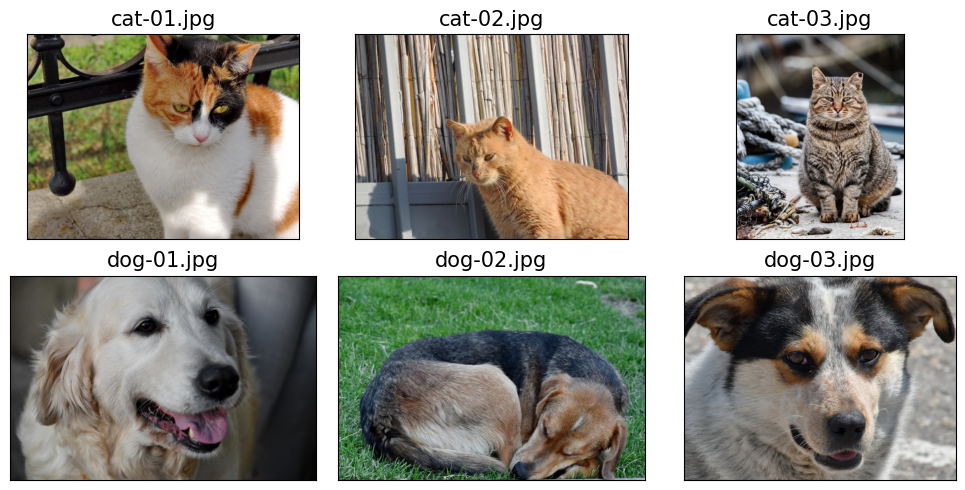

In [35]:
import matplotlib.pyplot as plt
import os
from PIL import Image

fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
  img = Image.open(file)
  ax = fig.add_subplot(2,3,i+1)
  ax.set_xticks([]); ax.set_yticks([])
  ax.imshow(img)
  ax.set_title(os.path.basename(file), size=15)

plt.tight_layout()
plt.show()

Just from this visualization and the printed image shapes, we can already see that the images have
different aspect ratios. If you print the aspect ratios (or data array shapes) of these images, you will see
that some images are 900 pixels high and 1200 pixels wide (900×1200), some are 800×1200, and one is
900×742. Later, we will preprocess these images to a consistent size. Another point to consider is that
the labels for these images are provided within their filenames. So, we extract these labels from the
list of filenames, assigning label 1 to dogs and label 0 to cats:

In [36]:
labels = [ 1 if 'dog' in os.path.basename(file) else 0 for file in file_list]

print(labels)

[0, 0, 0, 1, 1, 1]


Now, we have two lists: a list of filenames (or paths of each image) and a list of their labels. In the previous
section, you learned how to create a joint dataset from two arrays. Here, we will do the following:

In [37]:
class ImageDataset(Dataset):
  def __init__(self,file_list,label_list):
    self.file_list = file_list
    self.label_list = label_list

  def __getitem__(self,index):
    file = self.file_list[index]
    label = self.label_list[index]
    return file,label

  def __len__(self):
    return len(self.labels)

image_dataset = ImageDataset(file_list,labels)

for file, label in image_dataset:
  print(file, label)


/content/drive/MyDrive/Colab Notebooks/ML Book/Ch12/cat_dog_images/cat-01.jpg 0
/content/drive/MyDrive/Colab Notebooks/ML Book/Ch12/cat_dog_images/cat-02.jpg 0
/content/drive/MyDrive/Colab Notebooks/ML Book/Ch12/cat_dog_images/cat-03.jpg 0
/content/drive/MyDrive/Colab Notebooks/ML Book/Ch12/cat_dog_images/dog-01.jpg 1
/content/drive/MyDrive/Colab Notebooks/ML Book/Ch12/cat_dog_images/dog-02.jpg 1
/content/drive/MyDrive/Colab Notebooks/ML Book/Ch12/cat_dog_images/dog-03.jpg 1


Next, we need to apply transformations to this dataset: load the image content from its file path, decode
the raw content, and resize it to a desired size, for example, 80×120. As mentioned before, we
use the torchvision.transforms module to resize the images and convert the loaded pixels into
tensors as follows:


In [39]:
import torchvision.transforms as transforms
img_height, img_width = 80, 120
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((img_height, img_width))])

class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    def __len__(self):
        return len(self.labels)


image_dataset = ImageDataset(file_list, labels, transform)

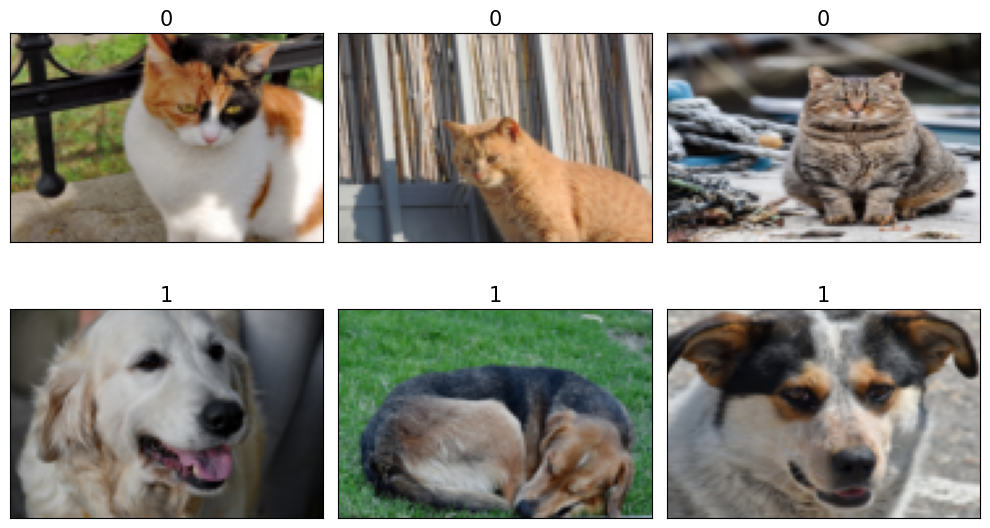

In [40]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)

plt.tight_layout()
plt.show()

## Fetching available datasets from the torchvision.datasets library

In [43]:
import torchvision

img_path = './'
celeba_dataset = torchvision.datasets.CelebA(root=img_path, split='train', target_type='attr', download=True)

FileURLRetrievalError: Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM

but Gdown can't. Please check connections and permissions.

To tylko przeczytam bo plik duzy

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 34.4MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.63MB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 13.6MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.05MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



(<PIL.Image.Image image mode=L size=28x28 at 0x79ACC17B6750>, 5)


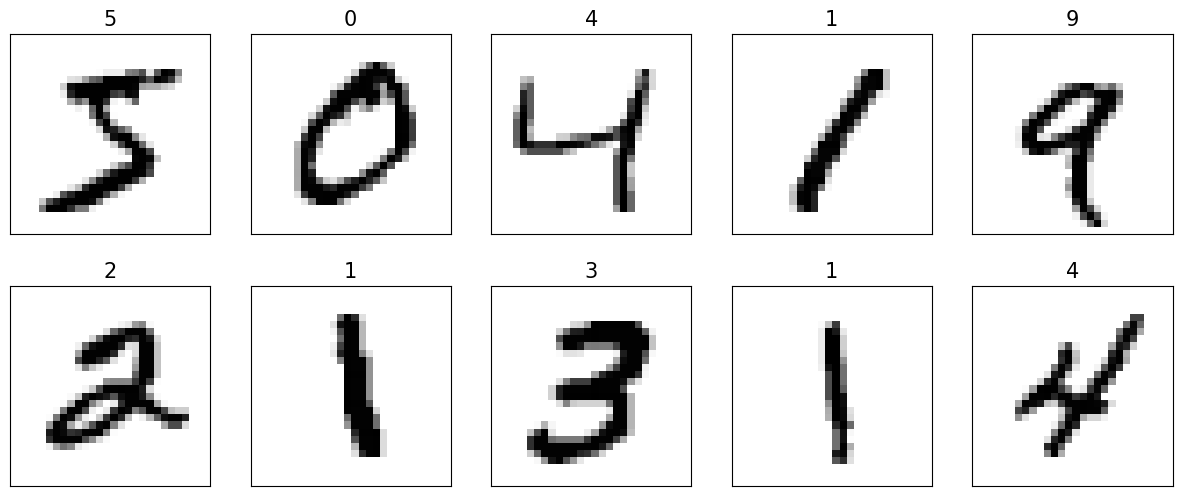

In [44]:
from itertools import islice

mnist_dataset = torchvision.datasets.MNIST(img_path, 'train', download=True)

assert isinstance(mnist_dataset, torch.utils.data.Dataset)

example = next(iter(mnist_dataset))
print(example)

fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)

plt.show()

## Building an NN model in PyTorch

### Building a linear regression model

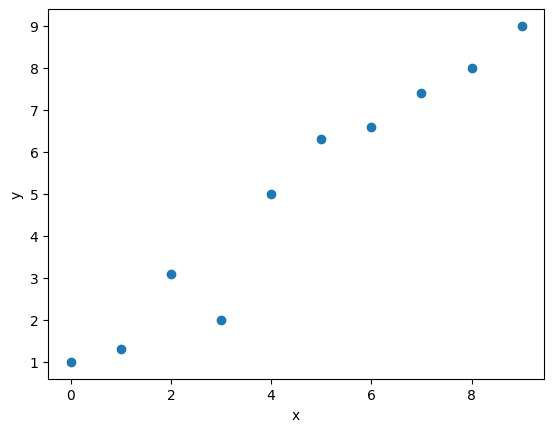

In [6]:
import numpy as np
import matplotlib.pyplot as plt

X_train = np.arange(10, dtype='float32').reshape((10,1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6,
                    7.4, 8.0, 9.0], dtype='float32')

plt.plot(X_train, y_train, 'o')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [7]:
#standardize the features
from torch.utils.data import TensorDataset, DataLoader
import torch

X_train_norm = (X_train - X_train.mean()) / X_train.std()
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
batch_size=1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [10]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)
def model(xb):
  return xb @ weight + bias

def loss_fn(input, target):
  return (input-target).pow(2).mean()

In [11]:
learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()

        with torch.no_grad():
            weight -= weight.grad * learning_rate
            bias -= bias.grad * learning_rate
            weight.grad.zero_()
            bias.grad.zero_()

    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')


Epoch 0  Loss 45.0782
Epoch 10  Loss 26.4366
Epoch 20  Loss 1.5918
Epoch 30  Loss 14.1307
Epoch 40  Loss 11.6038
Epoch 50  Loss 6.3084
Epoch 60  Loss 0.6349
Epoch 70  Loss 3.1374
Epoch 80  Loss 1.9999
Epoch 90  Loss 0.3133
Epoch 100  Loss 0.7653
Epoch 110  Loss 1.0039
Epoch 120  Loss 0.0235
Epoch 130  Loss 0.5176
Epoch 140  Loss 0.0759
Epoch 150  Loss 1.8789
Epoch 160  Loss 0.0008
Epoch 170  Loss 0.0866
Epoch 180  Loss 0.0646
Epoch 190  Loss 0.0011


Final Parameters: 2.6696107387542725 4.879678249359131


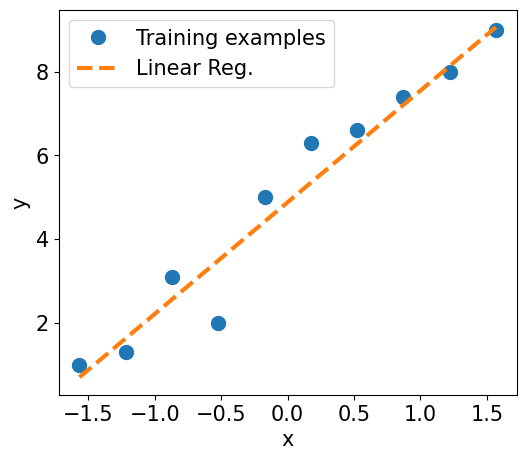

In [12]:
print('Final Parameters:', weight.item(), bias.item())

X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()

### Model training via the torch.nn and torch.optim modules

In [13]:
import torch.nn as nn
loss_fn = nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Now, we can simply call the step() method of the optimizer to train the model. We can pass a batched
dataset (such as train_dl, which was created in the previous example):

In [14]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        # 1. Generate predictions
        pred = model(x_batch)[:, 0]

        # 2. Calculate loss
        loss = loss_fn(pred, y_batch)

        # 3. Compute gradients
        loss.backward()

        # 4. Update parameters using gradients
        optimizer.step()

        # 5. Reset the gradients to zero
        optimizer.zero_grad()

    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 24.6684
Epoch 10  Loss 29.1377
Epoch 20  Loss 20.9207
Epoch 30  Loss 0.1257
Epoch 40  Loss 12.4922
Epoch 50  Loss 1.7845
Epoch 60  Loss 7.6425
Epoch 70  Loss 2.5606
Epoch 80  Loss 0.0157
Epoch 90  Loss 0.7548
Epoch 100  Loss 0.8412
Epoch 110  Loss 0.4923
Epoch 120  Loss 0.0823
Epoch 130  Loss 0.0794
Epoch 140  Loss 0.0891
Epoch 150  Loss 0.0973
Epoch 160  Loss 0.1043
Epoch 170  Loss 0.1103
Epoch 180  Loss 0.0009
Epoch 190  Loss 0.0764


In [15]:
print('Final Parameters:', model.weight.item(), model.bias.item())

Final Parameters: 2.6496422290802 4.87706995010376


## Building a multilayer perceptron for classifying flowers in the Iris dataset


In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1./3, random_state=1)

Next, we standardize the features (mean centering and dividing by the standard deviation) and create
a PyTorch Dataset for the training set and a corresponding DataLoader:

In [29]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)

train_ds = TensorDataset(X_train_norm, y_train)

torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

For this problem, we are going
to use the Linear layer, which is also known as a fully connected layer or dense layer, and can be best
represented by f(w × x + b), where x represents a tensor containing the input features, w and b are the
weight matrix and the bias vector, and f is the activation function.

Each layer in an NN receives its inputs from the preceding layer; therefore, its dimensionality (rank
and shape) is fixed. Typically, we need to concern ourselves with the dimensionality of output only
when we design an NN architecture. Here, we want to define a model with two hidden layers. The first
one receives an input of four features and projects them to 16 neurons. The second layer receives the
output of the previous layer (which has a size of 16) and projects them to three output neurons, since
we have three class labels. This can be done as follows:

In [19]:
class Model(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__() # wywołuje konstruktor (__init__()) klasy nadrzędnej (bazowej)
    self.layer1 = nn.Linear(input_size, hidden_size)
    self.layer2 = nn.Linear(hidden_size, output_size)

  def forward(self,x):
    x = self.layer1(x)
    x = nn.Sigmoid()(x)
    x = self.layer2(x)
    x = nn.Softmax(dim=1)(x)
    return x

Here, we used the sigmoid activation function for the first layer and softmax activation for the last
(output) layer. Softmax activation in the last layer is used to support multiclass classification since we
have three class labels here (which is why we have three neurons in the output layer). We will discuss
the different activation functions and their applications later in this chapter.

In [30]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size, hidden_size, output_size)

In [31]:
# specifying loss,lr and optimizer
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [32]:
# training model
num_epochs = 100
loss_list = [0] * num_epochs
accuracy_list = [0] * num_epochs
for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
    #1. pred
    pred = model(x_batch)

    #2.calculate the loss
    loss = loss_fn(pred,y_batch)

    #3.compute gradients
    loss.backward()

    #4. Optimizer step,step
    optimizer.step()

    #5.Optimizer zero_grad
    optimizer.zero_grad()

    loss_list[epoch] += loss.item() * y_batch.size(0)
    is_correct = (torch.argmax(pred,dim=1) == y_batch).float()
    accuracy_list[epoch] += is_correct.mean()
  loss_list[epoch] /= len(train_dl.dataset)
  accuracy_list[epoch] /= (len(train_dl.dataset))

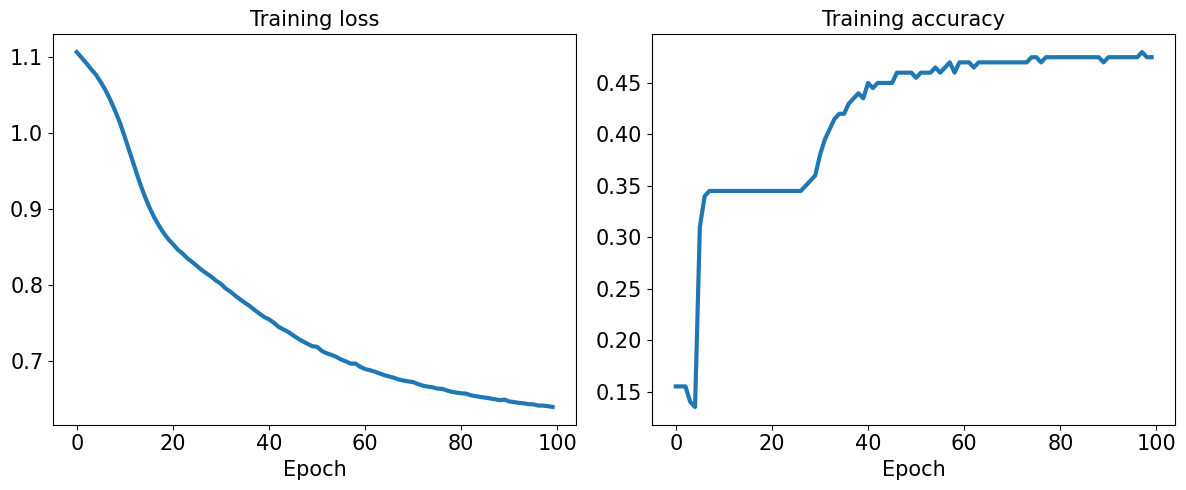

In [33]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_list, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_list, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

plt.show()

### Evaluating the trained model on the test dataset
We can now evaluate the classification accuracy of the trained model on the test dataset:

In [34]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)
pred_test = model(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()

print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


Since we trained our model with standardized features, we also applied the same standardization to
the test data. The classification accuracy is 0.98 (that is, 98 percent).

### Saving and reloading the trained model

In [35]:
path = 'iris_classifier.pt'
torch.save(model,path)

Calling save(model) will save both the model architecture and all the learned parameters. As a common
convention, we can save models using a 'pt' or 'pth' file extension.

In [38]:
# reload
model_new = torch.load(path)
#verify model_architecture
model_new.eval()

<ipython-input-38-3b91176e2e82>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_new = torch.load(path)


Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [39]:
pred_test = model_new(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()

print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


If you want to save only the learned parameters, you can use save(model.state_dict()) as follows:

In [40]:
path = 'iris_classifier_state_dict.pt'
torch.save(model.state_dict(), path)

To reload the saved parameters, we first need to construct the model as we did before, then feed the
loaded parameters to the model:

In [41]:
model_new = Model(input_size, hidden_size, output_size)
model_new.load_state_dict(torch.load(path))

<ipython-input-41-b21dbd0d4824>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_new.load_state_dict(torch.load(path))


<All keys matched successfully>

## Choosing activation functions for multilayer neural networks

### Logistic functio  recap

In [42]:
import numpy as np

X = np.array([1, 1.4, 2.5]) ## first value must be 1
w = np.array([0.4, 0.3, 0.5])

def net_input(X, w):
    return np.dot(X, w)

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

print(f'P(y=1|x) = {logistic_activation(X, w):.3f}')

P(y=1|x) = 0.888


In [43]:
# W : array with shape = (n_output_units, n_hidden_units+1)
# note that the first column are the bias units

W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])

# A : data array with shape = (n_hidden_units + 1, n_samples)
# note that the first column of this array must be 1

A = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot(W, A[0])
y_probas = logistic(Z)
print('Net Input: \n', Z)

print('Output Units:\n', y_probas)

Net Input: 
 [1.78 0.76 1.65]
Output Units:
 [0.85569687 0.68135373 0.83889105]


In [44]:
y_class = np.argmax(Z, axis=0)
print('Predicted class label:', y_class)

Predicted class label: 0


### Estimating class probabilities in multiclass classification via the softmax function

Softmax in action

In [46]:
def softmax(z):
  return np.exp(z) / np.sum(np.exp(z))

Z = np.array([1.2, 1.0, 0.1])
y_probas = softmax(Z)
print(y_probas)
print(np.sum(y_probas))

[0.46477001 0.3805215  0.1547085 ]
1.0


In [47]:
torch.softmax(torch.from_numpy(Z), dim=0)

tensor([0.4648, 0.3805, 0.1547], dtype=torch.float64)

### Broadening the output spectrum using a hyperbolic tangent

Simple
comparison of the logistic function and the hyperbolic tangent

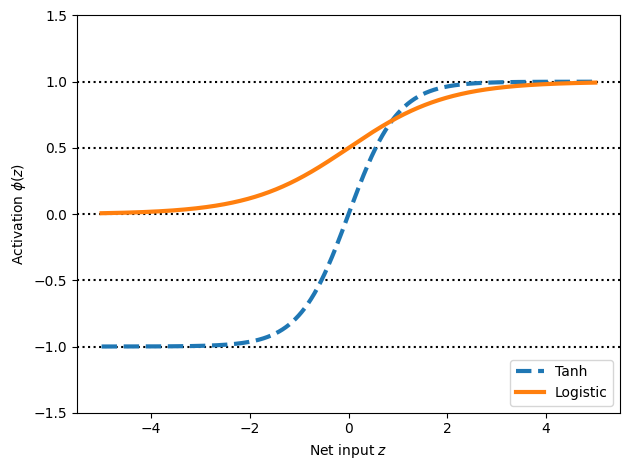

In [48]:
import matplotlib.pyplot as plt

def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)
plt.ylim([-1.5, 1.5])
plt.xlabel('Net input $z$')
plt.ylabel('Activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.plot(z, tanh_act,
    linewidth=3, linestyle='--',
    label='Tanh')
plt.plot(z, log_act,
    linewidth=3,
    label='Logistic')
plt.legend(loc='lower right')
plt.tight_layout()

#plt.savefig('figures/12_10.pdf')
plt.show()

Note that we previously implemented the logistic and tanh functions verbosely for the purpose of
illustration. In practice, we can use NumPy’s tanh function.
Alternatively, when building an NN model, we can use torch.tanh(x) in PyTorch to achieve the same
results:

In [49]:
np.tanh(z)

array([-0.9999092 , -0.99990829, -0.99990737, ...,  0.99990644,
        0.99990737,  0.99990829])

In [50]:
torch.tanh(torch.from_numpy(z))

tensor([-0.9999, -0.9999, -0.9999,  ...,  0.9999,  0.9999,  0.9999],
       dtype=torch.float64)

In addition, the logistic function is available in SciPy’s special module:

In [51]:
from scipy.special import expit

expit(z)

array([0.00669285, 0.00672617, 0.00675966, ..., 0.99320669, 0.99324034,
       0.99327383])

Similarly, we can use the torch.sigmoid() function in PyTorch to do the same computation, as follows:

In [52]:
torch.sigmoid(torch.from_numpy(z))

tensor([0.0067, 0.0067, 0.0068,  ..., 0.9932, 0.9932, 0.9933],
       dtype=torch.float64)

### Rectified linear unit activation

In [53]:
torch.relu(torch.from_numpy(z))

tensor([0.0000, 0.0000, 0.0000,  ..., 4.9850, 4.9900, 4.9950],
       dtype=torch.float64)

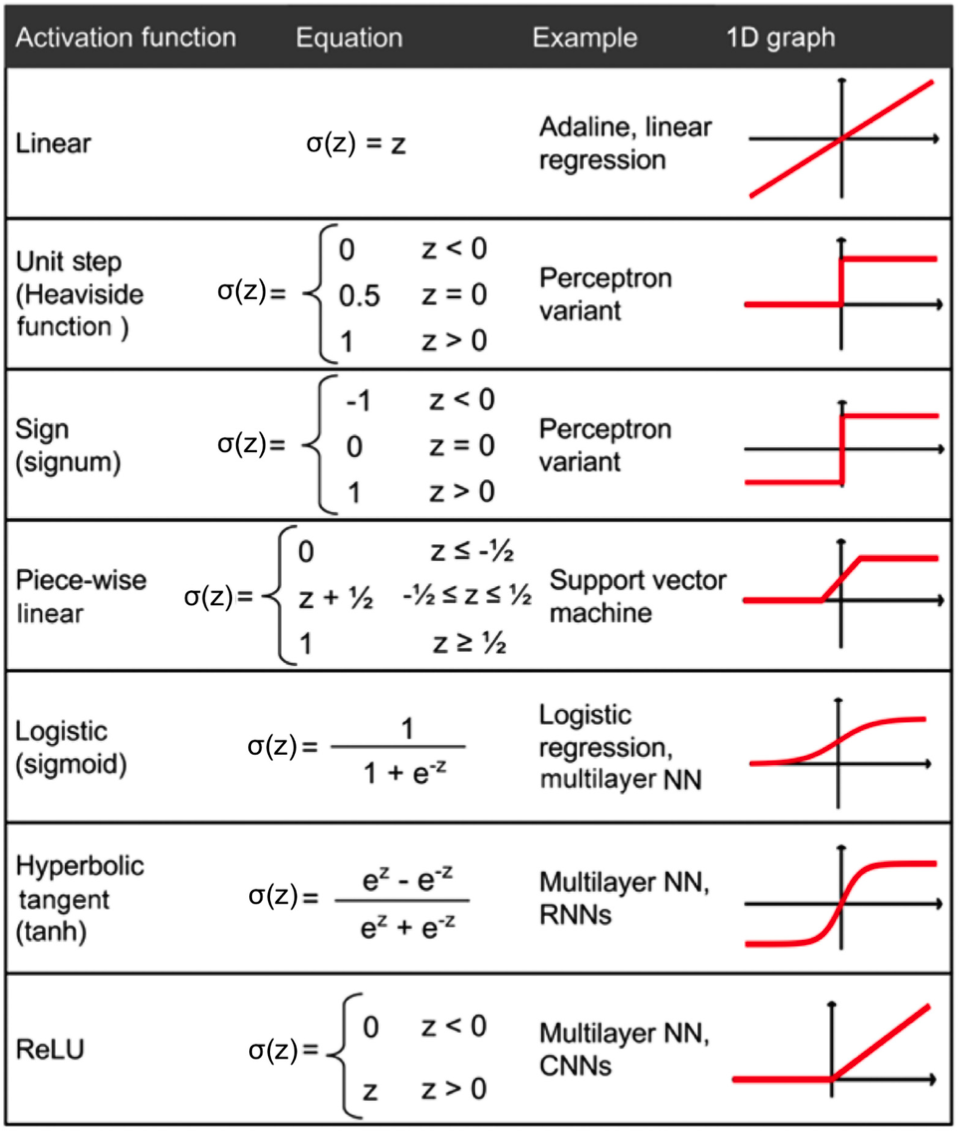

In [54]:
from IPython.display import Image as IPythonImage
IPythonImage(filename='/content/drive/MyDrive/Colab Notebooks/ML Book/Ch12/Activation_functions.png', width=500)